In [22]:
import pandas as pd
def toy_predict(x, y, w, b=0):
    df = pd.DataFrame({'x':x, 'y':y})
    df['pred'] = df['x'] * w + b
    df['diff'] = df['pred'] - df['y']
    df['diff2'] = df['diff'] * df['diff']
    return df
sqft = [2104, 1600, 2400]
price = [399.9, 329.9, 369]

In [23]:
houses = toy_predict(sqft, price, 0.18)
houses.head()

,x,y,pred,diff,diff2
0,2104,399.9,378.72,-21.18,448.5924
1,1600,329.9,288.00,-41.90,1755.6100
2,2400,369.0,432.00,63.00,3969.0000


In [24]:
import math
rmse = math.sqrt(houses['diff2'].mean())
rmse

45.36225450011643

Our "model" has an "error" of about $45,000 dollars, or a little over 10% of the highest price in the dataset

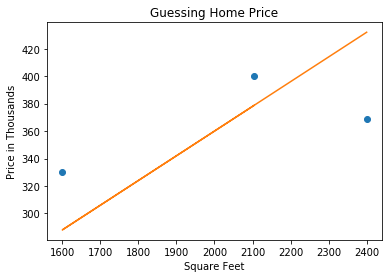

In [25]:
import matplotlib.pyplot as plt

plt.xlabel('Square Feet')
plt.ylabel('Price in Thousands')
plt.title('Guessing Home Price')

plt.scatter(houses['x'], houses['y'])
plt.plot(houses['x'], houses['pred'], color='C1')

plt.show()

In [26]:
houses2 = toy_predict(sqft, price, 0.1, 160)
houses2.head()

,x,y,pred,diff,diff2
0,2104,399.9,370.4,-29.5,870.25
1,1600,329.9,320.0,-9.9,98.01
2,2400,369.0,400.0,31.0,961.00


In [28]:
rmse = math.sqrt(houses2['diff2'].mean())
rmse

25.359153508480254

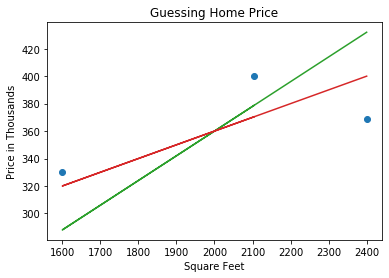

In [33]:
plt.xlabel('Square Feet')
plt.ylabel('Price in Thousands')
plt.title('Guessing Home Price')

plt.scatter(houses['x'], houses['y'])
plt.plot(houses['x'], houses['pred'], color='C2')
plt.plot(houses['x'], houses2['pred'], color='C3')

plt.show()

# Perceptron

In [39]:
import numpy as np
np.random.seed(143)

eg = np.array([
    [0,0,1],
    [1,1,1],
    [1,0,1],
    [0,1,1]
])
cf = np.array([
    [0], [1], [1], [0]
])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    sx = sigmoid(x)
    return sx * (1 - sx)

In [45]:
def train_perceptron(X, y):
    weights = 2 * np.random.random((len(X[0]), 1)) - 1
    output = lambda x: sigmoid(np.dot(x, weights))
    for _ in range(10000):
        activated_output = output(X)
        error = y - activated_output
        adjusted = error * sigmoid_deriv(activated_output)
        weights += np.dot(X.T, adjusted)
    return output(X)

train_perceptron(eg, cf)

array([[7.22175548e-04],
       [9.99388102e-01],
       [9.99592463e-01],
       [4.81002089e-04]])

In [38]:
1 / (1 + np.exp(-np.array([0,1,1,0])))

array([0.5       , 0.73105858, 0.73105858, 0.5       ])